In [1]:
import requests
from requests import HTTPError, Timeout, RequestException

def fetch_data(url, params=None, headers=None, timeout=10):
    try:
        response = requests.get(url, params=params, headers=headers, timeout=timeout)
        # Raises HTTPError for bad responses
        response.raise_for_status()  
        # Return if data was acquired
        if response.json():
            print("Data fetched successfully")
            return response.json()
        else:
            print("Failed to fetch data")
    
    # Errro handling
    except HTTPError as http_err:
        print(f"HTTP error occurred: {http_err}")
    except ConnectionError:
        print("Error: Failed to connect to the server.")
    except Timeout:
        print("Error: The request timed out.")
    except RequestException as req_err:
        print(f"An unexpected error occurred: {req_err}")

In [2]:
url = "http://localhost:8000/players"

data = fetch_data(url)
import pandas as pd
display(pd.DataFrame(data))

Data fetched successfully


,PERSON_ID,FIRST_NAME,LAST_NAME
0,2544,LeBron,James
1,101108,Chris,Paul
2,200768,Kyle,Lowry
3,201142,Kevin,Durant
4,201143,Al,Horford
...,...,...,...
560,1642461,Spencer,Jones
561,1642484,RayJ,Dennis
562,1642502,Malevy,Leons
563,1642505,Alex,Ducas


In [8]:
# Get LeBron stats
url = "http://localhost:8000/players/2544"

data = fetch_data(url)
import pandas as pd
lebron_df = pd.DataFrame(data)
display(lebron_df)

Data fetched successfully


,PERSON_ID,FIRST_NAME,LAST_NAME,TEAM_ID,GP,GS,MIN,FGM,FGA,FG_PCT,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,2544,LeBron,James,1610612747,1548,1546,58540.0,15370,30340,0.506592,...,0.736603,1783,9852,11635,11487,2327,1145,5435,2761,41871


[0.506591957811 0.350055126791 0.73660293235]


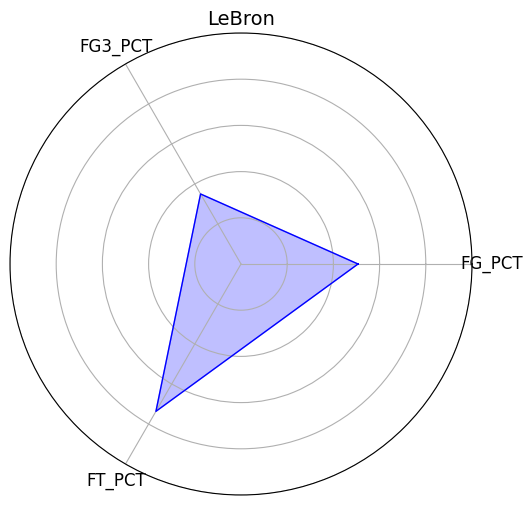

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Extract values for the radar plot
values = lebron_df.iloc[0][['FG_PCT', 'FG3_PCT', 'FT_PCT']].values
print(values)
categories = ['FG_PCT', 'FG3_PCT', 'FT_PCT']

# Compute angle for each category
angles = np.linspace(0, 2 * np.pi, 3, endpoint=False).tolist()

# Make the plot a circle
values = np.concatenate((values, [values[0]]))
angles += angles[:1] 

# Plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=1)  

# Set the labels
ax.set_yticklabels([])  
ax.set_xticks(angles[:-1])  
ax.set_xticklabels(categories, fontsize=12)
ax.set_ylim(0, 1)

# Display the plot
plt.title('LeBron', fontsize=14)
plt.show()


Data fetched successfully


,PERSON_ID,FIRST_NAME,LAST_NAME,TEAM_ID,GP,GS,MIN,FGM,FGA,FG_PCT,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,Name
0,2544,LeBron,James,1610612747,1548,1546,58540.0,15370,30340,0.506592,...,1783,9852,11635,11487,2327,1145,5435,2761,41871,LeBron James
3,201142,Kevin,Durant,1610612756,1110,1107,40775.0,10428,20782,0.501780,...,735,7015,7750,4853,1168,1262,3509,2119,30240,Kevin Durant
7,201566,Russell,Westbrook,1610612743,1217,1068,40597.0,9324,21240,0.438983,...,1947,6633,8580,9804,1927,397,4757,3107,25921,Russell Westbrook
15,201942,DeMar,DeRozan,1610612758,1166,1154,40469.0,8896,18943,0.469619,...,818,4312,5130,4746,1162,384,2350,2616,24824,DeMar DeRozan
14,201939,Stephen,Curry,1610612744,1009,1003,34424.0,8510,18050,0.471468,...,657,4089,4746,6452,1530,258,3136,2285,24945,Stephen Curry


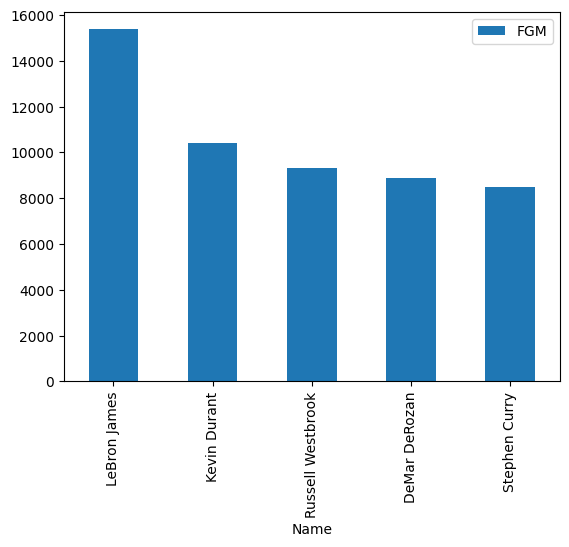

In [23]:
url = "http://localhost:8000/alldata"

data = fetch_data(url)

import pandas as pd
df = pd.DataFrame(data)

# Top-scoring players
top_scorers = df.sort_values("FGM", ascending=False)[0:5]
top_scorers["Name"] = top_scorers["FIRST_NAME"] + " " + top_scorers["LAST_NAME"]
top_scorers.plot.bar(x="Name", y="FGM")

display(top_scorers)